In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapefile
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from shapely.geometry import Point
import shapely
from shapely.geometry import *
from geopandas.geoseries import *
from scipy.spatial import distance

## XGBoost R Sqaure寫法

In [69]:
from sklearn.metrics import r2_score
import xgboost as xgb
x_train, x_valid, y_train, y_valid = train_test_split(total_features.as_matrix(), label.as_matrix(), test_size=0.3, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
#d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4
params['n_estimator'] = 50

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:4.16416	valid-rmse:4.16061	train-r2:-436.332	valid-r2:-411.43
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:3.40474	valid-rmse:3.40125	train-r2:-291.364	valid-r2:-274.621
[20]	train-rmse:2.78457	valid-rmse:2.78096	train-r2:-194.556	valid-r2:-183.257
[30]	train-rmse:2.27811	valid-rmse:2.27414	train-r2:-129.889	valid-r2:-122.217
[40]	train-rmse:1.86458	valid-rmse:1.86066	train-r2:-86.6833	valid-r2:-81.4843
[50]	train-rmse:1.52702	valid-rmse:1.52353	train-r2:-57.8089	valid-r2:-54.302
[60]	train-rmse:1.25157	valid-rmse:1.24885	train-r2:-38.5064	valid-r2:-36.1582
[70]	train-rmse:1.02692	valid-rmse:1.02496	train-r2:-25.5969	valid-r2:-24.0292
[80]	train-rmse:0.843808	valid-rmse:0.842708	train-r2:-16.9574	valid-r2:-15.9196
[90]	train-rmse:0.694724	valid-rmse:0.694539	train-r2:-11.1725	valid-r2:-10.4929
[100]	train-rmse:0.573559	valid-rmse:0.574464	train-r2:-7.29683	vali

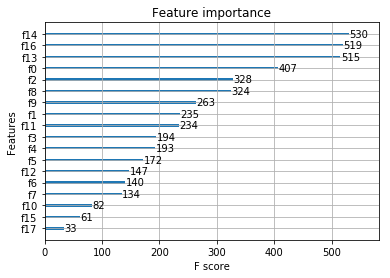

In [70]:
from xgboost import plot_importance
plot_importance(clf,max_num_features=20)
plt.show()

In [352]:
total_features.columns

Index(['Convi_Dis', 'Trans_Dis', 'Resta_Dis', 'Trans_P', 'Dali_AllRe',
       'Dali_Convi', 'Dali_Convi', 'Dali_Hotel', 'Dali_Indus', 'Dali_Major',
       'Dali_MixRe', 'Dali_Pure', 'Daili_Resta', '建物移轉總面積平方公尺', 'Dali_age',
       'Dali_Materials', 'Dali_layers'],
      dtype='object')

## 去掉前後100筆 or 5%資料

In [ ]:
index=list(label.sort_values(by=['單價(元/平方公尺)']).index)
total_features=total_features.loc[index].iloc[1500:30000,:]
total_features=total_features.iloc[0:27000,:]
label=label.loc[index].iloc[1500:30000,:]
label=label.iloc[0:27000,:]
label.shape

In [153]:
total_features.shape

(29800, 124)

In [25]:
total_features=total_features[total_features['may_be_zero']!=1]
total_features.shape

(29546, 132)

In [278]:
label = total_features['總價(元)']
total_features = total_features.drop(['總價(元)','may_be_zero'],axis=1)

In [279]:
label=label.fillna(0)
median = np.median(label[label > 0])
label[label == 0] = median
label=np.log10(label)
label.shape

(29546,)

In [226]:
total_features.shape

(29546, 123)

In [365]:
label = _80k_real_data['總價(元)']
label=label.fillna(0)
median = np.median(label[label > 0])
label[label == 0] = median
label=np.log10(label)
label = pd.DataFrame(label)
label = label.iloc[0:30000,:]
label=label.reset_index(drop=True)
label.shape

(30000, 1)

In [266]:
label = _80k_real_data['總價(元)']
label=label.fillna(0)
label[label <= 0]

level_0
8638     0
16240    0
17438    0
17490    0
17766    0
43603    0
Name: 總價(元), dtype: int64

In [261]:
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(total_features.as_matrix(), label.as_matrix(), test_size=0.3, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train,feature_names=total_features.columns.values)
d_valid = xgb.DMatrix(x_valid, label=y_valid,feature_names=total_features.columns.values)
#d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4
params['n_estimator'] = 100
params['nthread'] = 4
#params['learning_rate']=0.01

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 5000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:6.26057	valid-rmse:6.25698	train-r2:-264.975	valid-r2:-267.584
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:5.11693	valid-rmse:5.11432	train-r2:-176.678	valid-r2:-178.443
[20]	train-rmse:4.18265	valid-rmse:4.18085	train-r2:-117.718	valid-r2:-118.917
[30]	train-rmse:3.41944	valid-rmse:3.4183	train-r2:-78.3455	valid-r2:-79.1623
[40]	train-rmse:2.79604	valid-rmse:2.79546	train-r2:-52.0517	valid-r2:-52.6116
[50]	train-rmse:2.28691	valid-rmse:2.28692	train-r2:-34.4904	valid-r2:-34.88
[60]	train-rmse:1.8712	valid-rmse:1.87166	train-r2:-22.7603	valid-r2:-23.0327
[70]	train-rmse:1.53188	valid-rmse:1.53264	train-r2:-14.9245	valid-r2:-15.1149
[80]	train-rmse:1.25509	valid-rmse:1.25616	train-r2:-9.68961	valid-r2:-9.82536
[90]	train-rmse:1.02947	valid-rmse:1.03074	train-r2:-6.19182	valid-r2:-6.28865
[100]	train-rmse:0.845608	valid-rmse:0.847091	train-r2:-3.85233	valid-r2:-

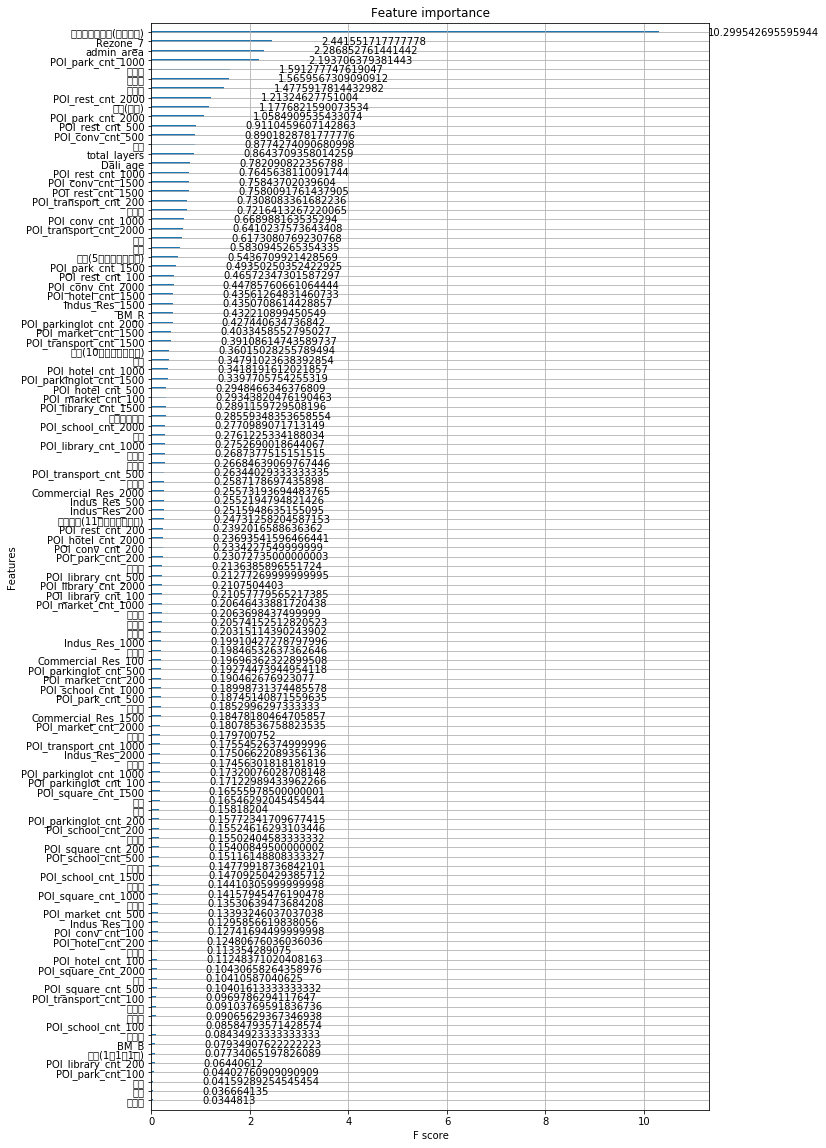

In [262]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (10, 20))
plot_importance(clf,ax=ax,importance_type='gain')
plt.show()

In [38]:
clf.save_model('NCKU_house_predict_xgb.model')

In [29]:
from sklearn.datasets import load_iris, load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [431]:
random_seed = 5 # set seed for same train test data split
x_train, x_test, y_train, y_test = train_test_split(total_features.as_matrix(), label.as_matrix(),
                                                    random_state=random_seed
                                                   )
reg = RandomForestRegressor(n_estimators=100,n_jobs=50)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
#reg.score(x_test,y_test)
r2_score(y_test,y_pred)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.43401506815129165

                         importance
feature                            
建物移轉總面積(平方公尺)                 0.797
POI_rest_cnt_2000             0.010
POI_conv_cnt_1500             0.010
POI_conv_cnt_2000             0.009
POI_park_cnt_2000             0.008
POI_school_cnt_2000           0.008
POI_conv_cnt_500              0.007
POI_conv_cnt_1000             0.007
POI_park_cnt_1500             0.007
POI_school_cnt_1500           0.006
POI_school_cnt_1000           0.006
POI_market_cnt_2000           0.005
POI_park_cnt_1000             0.005
POI_parkinglot_cnt_2000       0.005
POI_rest_cnt_500              0.005
POI_rest_cnt_1500             0.005
POI_rest_cnt_1000             0.005
POI_hotel_cnt_2000            0.004
Rezone_7                      0.004
POI_school_cnt_500            0.004
POI_hotel_cnt_500             0.004
POI_conv_cnt_200              0.004
POI_market_cnt_1500           0.004
POI_hotel_cnt_1500            0.003
POI_hotel_cnt_1000            0.003
POI_library_cnt_2000        

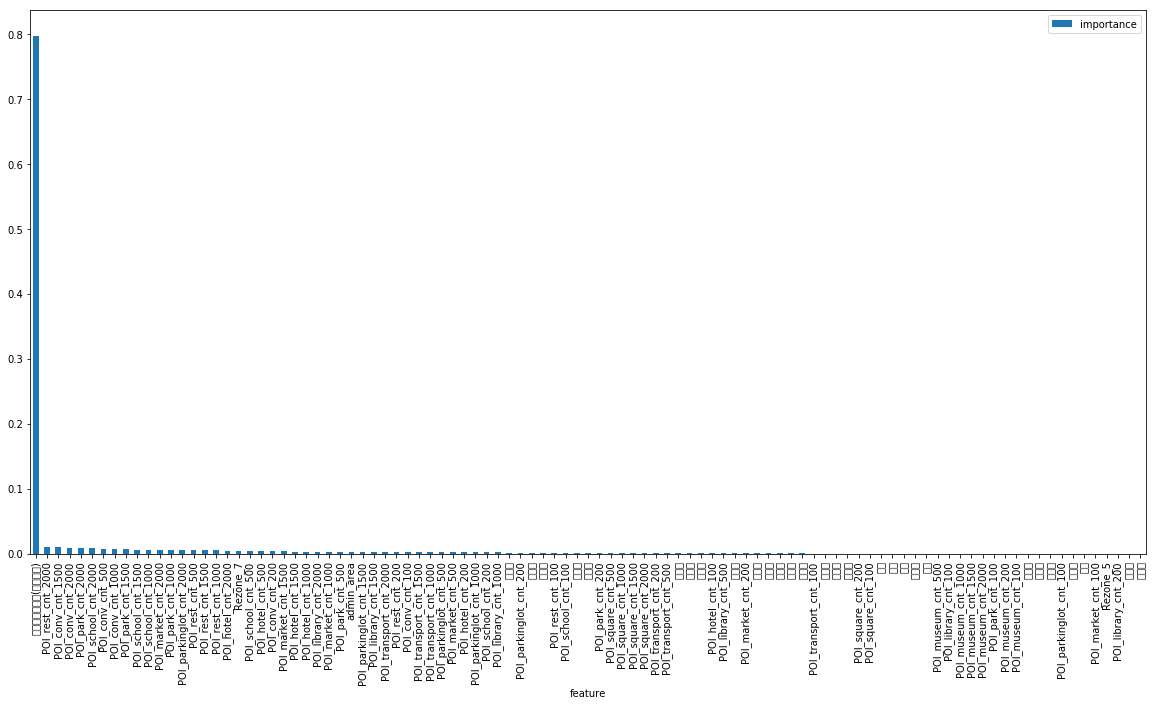

In [210]:
importances = pd.DataFrame({'feature':total_features.columns,'importance':np.round(reg.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print(importances)
importances.to_csv('RF_imporance_總價.csv')

fig, ax = plt.subplots(figsize = (20, 10))
importances.plot.bar(ax=ax)

In [429]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
% pylab inline
X_train, X_test, Y_train, Y_test = train_test_split(total_features.as_matrix(), label.as_matrix(), test_size=0.3)
eval_set =  [(X_test, Y_test)]

print('start modelling!')
model = XGBRegressor(n_estimators=1000,max_depth=4)
model.fit(X_train, Y_train, early_stopping_rounds=50, eval_metric="rmse", eval_set=eval_set,
         verbose=True)

Populating the interactive namespace from numpy and matplotlib
start modelling!


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['median']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[0]	validation_0-rmse:3.79485
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:3.41656
[2]	validation_0-rmse:3.07612
[3]	validation_0-rmse:2.76981
[4]	validation_0-rmse:2.49425
[5]	validation_0-rmse:2.24642
[6]	validation_0-rmse:2.02347
[7]	validation_0-rmse:1.82288
[8]	validation_0-rmse:1.64247
[9]	validation_0-rmse:1.48023
[10]	validation_0-rmse:1.33443
[11]	validation_0-rmse:1.20347
[12]	validation_0-rmse:1.08583
[13]	validation_0-rmse:0.980131
[14]	validation_0-rmse:0.885303
[15]	validation_0-rmse:0.800287
[16]	validation_0-rmse:0.723999
[17]	validation_0-rmse:0.655945
[18]	validation_0-rmse:0.59499
[19]	validation_0-rmse:0.540509
[20]	validation_0-rmse:0.492022
[21]	validation_0-rmse:0.448828
[22]	validation_0-rmse:0.410524
[23]	validation_0-rmse:0.376778
[24]	validation_0-rmse:0.34677
[25]	validation_0-rmse:0.320402
[26]	validation_0-rmse:0.297431
[27]	validation_0-rmse:0.277249
[28]	validation_0-rmse:0.259912
[29]	validation_0-rmse:0.244983


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [430]:
from sklearn.metrics import r2_score
model.score(X_test,Y_test)
Y_pred = model.predict(X_test)
r2_score(Y_test,Y_pred)

0.44579648685502793

In [90]:
import pickle
pickle.dump(model, open("NCKU_House_Predict_xgbR.model", "wb"))

                        importance
feature                           
Dali_age                     0.146
total_layers                 0.076
Commercial_Res_2000          0.038
Indus_Res_2000               0.032
Indus_Res_1500               0.029
Indus_Res_500                0.028
Indus_Res_1000               0.026
Commercial_Res_1500          0.026
Commercial_Res_100           0.024
csv_file_name                0.020
POI_conv_cnt_1500            0.019
POI_conv_cnt_2000            0.019
Indus_Res_200                0.018
Indus_Res_100                0.018
POI_conv_cnt_500             0.017
POI_conv_cnt_200             0.016
POI_conv_cnt_1000            0.015
POI_rest_cnt_2000            0.013
其他                           0.013
POI_rest_cnt_500             0.013
POI_hotel_cnt_500            0.012
POI_school_cnt_2000          0.012
套房(1房1廳1衛)                   0.011
POI_rest_cnt_1500            0.011
POI_hotel_cnt_1500           0.011
公寓(5樓含以下無電梯)                 0.011
POI_school_cnt_1500 

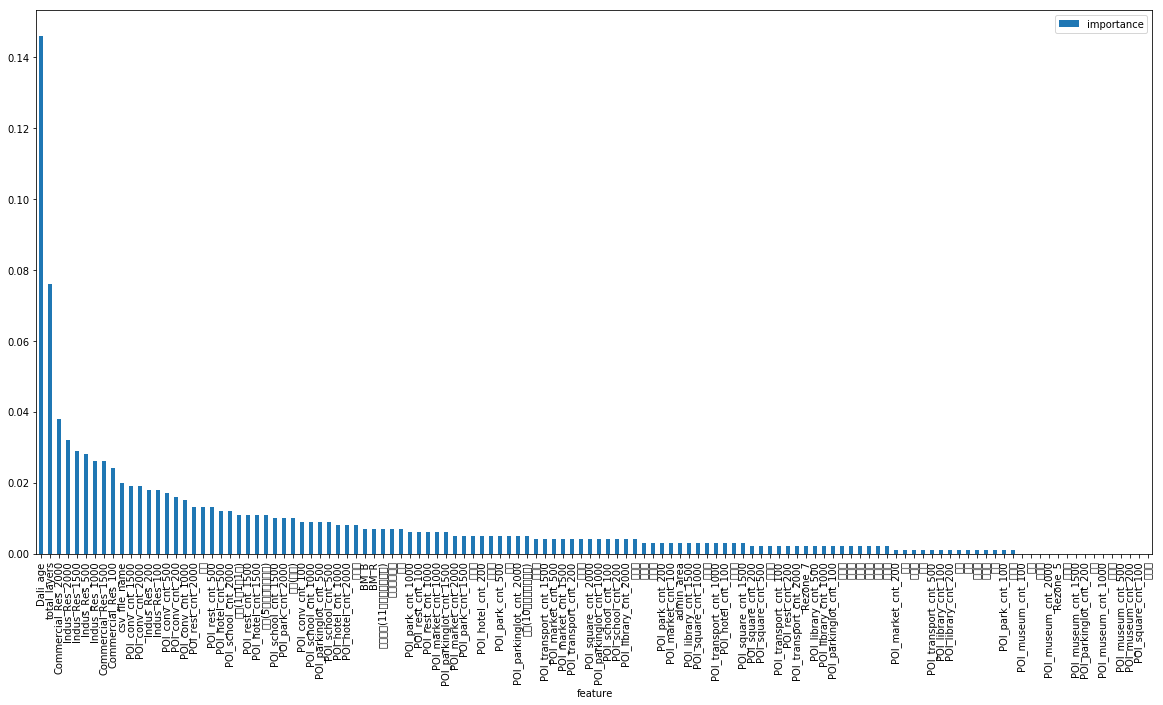

In [432]:
importances = pd.DataFrame({'feature':total_features.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print(importances)
importances.to_csv('XGB_imporance-POI-area_總價.csv')

fig, ax = plt.subplots(figsize = (20, 10))
importances.plot.bar(ax=ax)

In [211]:
s_Y_test=np.sort(Y_test, axis=0)
s_Y_pred=np.sort(Y_pred, axis=0)

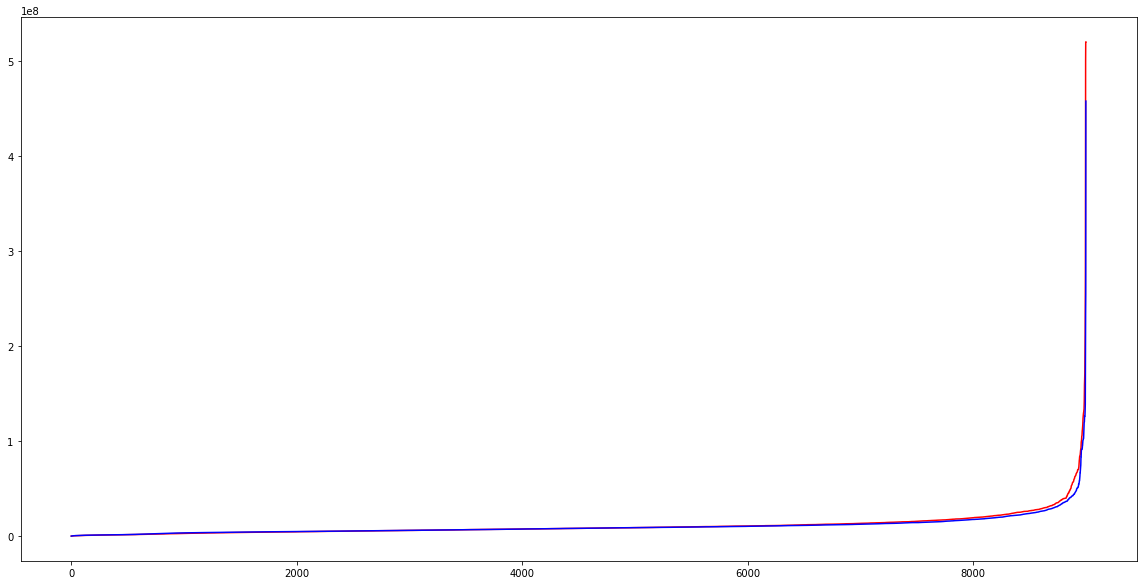

In [212]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(10**s_Y_test,color='red')
plt.plot(10**s_Y_pred,color='blue')
#plt.scatter(Y_pred.x,color='blue')
plt.show()